# Dataset setup

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.utils.linear_assignment_ import linear_assignment
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

encoder_dims = [784,500,500,2000,10] #[0]==Input

x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

x_train-= np.mean(x_train)
x_test-= np.mean(x_test)

def accuracy_details(y,labels,log=True):
    w = np.zeros((10,10))
    
    #Generate confusion matrix for labels and predictions
    for i in range(len(y)):
            w[y[i],labels[i]]+=1
        
    #Solve linear assignment problem for confusion matrix with negative values
    #since we are minimizing the cost
    correct_mapping = linear_assignment(-w)
    
    #Summ all correct frequencies to get accuracy from predictions
    acc = float(sum([w[i, j] for i, j in correct_mapping]))/ len(labels)
    #Plot confusion matrix for prediction and labels
    if log:
        plt.matshow(w)
        plt.show()
        print("Accuracy: "+str(acc))
        print()
        
    return acc

# Individual autoencoder pretraining

In [ ]:
#Data that will be propagated through each encoder for training
data=x_train 
for i in range(len(encoder_dims)-1):
    
    act1 = "relu"
    if i == 3: #Last encoder has linear activation
        act1 = "linear"
        
    act2 = "relu"
    if i == 0: #Last decoder has linear activation
        act2 = "linear"

    x = tf.keras.layers.Input((encoder_dims[i],))
    drop1 = tf.keras.layers.Dropout(0.2)(x)
    h1 = tf.keras.layers.Dense(encoder_dims[i+1], activation=act1)(drop1)
    drop2 = tf.keras.layers.Dropout(0.2)(h1)
    h2 = tf.keras.layers.Dense(encoder_dims[i], activation=act2)(drop2)
    
    autoencoder = tf.keras.models.Model(x,h2)
    encoder = tf.keras.models.Model(x,h1)
    
    opt = tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9, decay=0.0)
    
    autoencoder.compile(optimizer=opt,
                  loss='mean_squared_error')

    autoencoder.fit(data, data,batch_size=256, epochs=500, verbose =2)
    #Encode data for next encoder
    data=encoder.predict(data)
    
    #Export weights after training
    e = autoencoder.layers[2].get_weights()
    d = autoencoder.layers[4].get_weights()

    np.savetxt("pre1_ew"+str(i),e[0])
    np.savetxt("pre1_eb"+str(i),e[1])
    np.savetxt("pre1_dw"+str(i),d[0])
    np.savetxt("pre1_db"+str(i),d[1])

Epoch 1/500
 - 4s - loss: 0.1174
Epoch 2/500
 - 2s - loss: 0.0913
Epoch 3/500
 - 2s - loss: 0.0827
Epoch 4/500
 - 2s - loss: 0.0776
Epoch 5/500
 - 2s - loss: 0.0741
Epoch 6/500
 - 2s - loss: 0.0715
Epoch 7/500
 - 2s - loss: 0.0695
Epoch 8/500
 - 2s - loss: 0.0678
Epoch 9/500
 - 2s - loss: 0.0663
Epoch 10/500
 - 2s - loss: 0.0650
Epoch 11/500
 - 2s - loss: 0.0638
Epoch 12/500
 - 2s - loss: 0.0627
Epoch 13/500
 - 2s - loss: 0.0616
Epoch 14/500
 - 2s - loss: 0.0606
Epoch 15/500
 - 2s - loss: 0.0597
Epoch 16/500
 - 2s - loss: 0.0588
Epoch 17/500
 - 2s - loss: 0.0580
Epoch 18/500
 - 2s - loss: 0.0572
Epoch 19/500
 - 2s - loss: 0.0564
Epoch 20/500
 - 2s - loss: 0.0556
Epoch 21/500
 - 2s - loss: 0.0549
Epoch 22/500
 - 2s - loss: 0.0543
Epoch 23/500
 - 2s - loss: 0.0536
Epoch 24/500
 - 2s - loss: 0.0530
Epoch 25/500
 - 2s - loss: 0.0524
Epoch 26/500
 - 2s - loss: 0.0518
Epoch 27/500
 - 2s - loss: 0.0513
Epoch 28/500
 - 2s - loss: 0.0507
Epoch 29/500
 - 2s - loss: 0.0502
Epoch 30/500
 - 2s - lo

 - 2s - loss: 0.0266
Epoch 239/500
 - 2s - loss: 0.0266
Epoch 240/500
 - 2s - loss: 0.0266
Epoch 241/500
 - 2s - loss: 0.0265
Epoch 242/500
 - 2s - loss: 0.0265
Epoch 243/500
 - 2s - loss: 0.0265
Epoch 244/500
 - 2s - loss: 0.0264
Epoch 245/500
 - 2s - loss: 0.0264
Epoch 246/500
 - 2s - loss: 0.0264
Epoch 247/500
 - 2s - loss: 0.0264
Epoch 248/500
 - 2s - loss: 0.0263
Epoch 249/500
 - 2s - loss: 0.0263
Epoch 250/500
 - 2s - loss: 0.0262
Epoch 251/500
 - 2s - loss: 0.0262
Epoch 252/500
 - 2s - loss: 0.0262
Epoch 253/500
 - 2s - loss: 0.0262
Epoch 254/500
 - 2s - loss: 0.0262
Epoch 255/500
 - 2s - loss: 0.0261
Epoch 256/500
 - 2s - loss: 0.0261
Epoch 257/500
 - 2s - loss: 0.0261
Epoch 258/500
 - 2s - loss: 0.0260
Epoch 259/500
 - 2s - loss: 0.0260
Epoch 260/500
 - 2s - loss: 0.0260
Epoch 261/500
 - 2s - loss: 0.0259
Epoch 262/500
 - 2s - loss: 0.0259
Epoch 263/500
 - 2s - loss: 0.0259
Epoch 264/500
 - 2s - loss: 0.0259
Epoch 265/500
 - 2s - loss: 0.0258
Epoch 266/500
 - 2s - loss: 0.0258

Epoch 473/500
 - 2s - loss: 0.0223
Epoch 474/500
 - 2s - loss: 0.0223
Epoch 475/500
 - 2s - loss: 0.0222
Epoch 476/500
 - 2s - loss: 0.0222
Epoch 477/500
 - 2s - loss: 0.0222
Epoch 478/500
 - 2s - loss: 0.0222
Epoch 479/500
 - 2s - loss: 0.0222
Epoch 480/500
 - 2s - loss: 0.0222
Epoch 481/500
 - 2s - loss: 0.0222
Epoch 482/500
 - 2s - loss: 0.0222
Epoch 483/500
 - 2s - loss: 0.0221
Epoch 484/500
 - 2s - loss: 0.0222
Epoch 485/500
 - 2s - loss: 0.0221
Epoch 486/500
 - 2s - loss: 0.0221
Epoch 487/500
 - 2s - loss: 0.0221
Epoch 488/500
 - 2s - loss: 0.0221
Epoch 489/500
 - 2s - loss: 0.0220
Epoch 490/500
 - 2s - loss: 0.0221
Epoch 491/500
 - 2s - loss: 0.0221
Epoch 492/500
 - 2s - loss: 0.0221
Epoch 493/500
 - 2s - loss: 0.0220
Epoch 494/500
 - 2s - loss: 0.0221
Epoch 495/500
 - 2s - loss: 0.0220
Epoch 496/500
 - 2s - loss: 0.0220
Epoch 497/500
 - 2s - loss: 0.0220
Epoch 498/500
 - 2s - loss: 0.0220
Epoch 499/500
 - 2s - loss: 0.0220
Epoch 500/500
 - 2s - loss: 0.0220
Epoch 1/500
 - 1s - 

 - 1s - loss: 0.0068
Epoch 211/500
 - 1s - loss: 0.0068
Epoch 212/500
 - 1s - loss: 0.0068
Epoch 213/500
 - 1s - loss: 0.0068
Epoch 214/500
 - 1s - loss: 0.0068
Epoch 215/500
 - 1s - loss: 0.0068
Epoch 216/500
 - 1s - loss: 0.0068
Epoch 217/500
 - 1s - loss: 0.0067
Epoch 218/500
 - 1s - loss: 0.0067
Epoch 219/500
 - 1s - loss: 0.0067
Epoch 220/500
 - 1s - loss: 0.0067
Epoch 221/500
 - 1s - loss: 0.0067
Epoch 222/500
 - 1s - loss: 0.0067
Epoch 223/500
 - 1s - loss: 0.0067
Epoch 224/500
 - 1s - loss: 0.0067
Epoch 225/500
 - 1s - loss: 0.0067
Epoch 226/500
 - 1s - loss: 0.0067
Epoch 227/500
 - 1s - loss: 0.0067
Epoch 228/500
 - 1s - loss: 0.0067
Epoch 229/500
 - 1s - loss: 0.0066
Epoch 230/500
 - 1s - loss: 0.0066
Epoch 231/500
 - 1s - loss: 0.0066
Epoch 232/500
 - 1s - loss: 0.0066
Epoch 233/500
 - 1s - loss: 0.0066
Epoch 234/500
 - 1s - loss: 0.0066
Epoch 235/500
 - 1s - loss: 0.0066
Epoch 236/500
 - 1s - loss: 0.0066
Epoch 237/500
 - 1s - loss: 0.0066
Epoch 238/500
 - 1s - loss: 0.0066

Epoch 445/500
 - 1s - loss: 0.0057
Epoch 446/500
 - 1s - loss: 0.0057
Epoch 447/500
 - 1s - loss: 0.0057
Epoch 448/500
 - 1s - loss: 0.0057
Epoch 449/500
 - 1s - loss: 0.0057
Epoch 450/500
 - 1s - loss: 0.0057
Epoch 451/500
 - 1s - loss: 0.0057
Epoch 452/500
 - 1s - loss: 0.0057
Epoch 453/500
 - 1s - loss: 0.0057
Epoch 454/500
 - 1s - loss: 0.0057
Epoch 455/500
 - 1s - loss: 0.0056
Epoch 456/500
 - 1s - loss: 0.0056
Epoch 457/500
 - 1s - loss: 0.0056
Epoch 458/500
 - 1s - loss: 0.0056
Epoch 459/500
 - 1s - loss: 0.0056
Epoch 460/500
 - 1s - loss: 0.0056
Epoch 461/500
 - 1s - loss: 0.0056
Epoch 462/500
 - 1s - loss: 0.0056
Epoch 463/500
 - 1s - loss: 0.0056
Epoch 464/500
 - 1s - loss: 0.0056
Epoch 465/500
 - 1s - loss: 0.0056
Epoch 466/500
 - 1s - loss: 0.0056
Epoch 467/500
 - 1s - loss: 0.0056
Epoch 468/500
 - 1s - loss: 0.0056
Epoch 469/500
 - 1s - loss: 0.0056
Epoch 470/500
 - 1s - loss: 0.0056
Epoch 471/500
 - 1s - loss: 0.0056
Epoch 472/500
 - 1s - loss: 0.0056
Epoch 473/500
 - 1s 

 - 1s - loss: 0.0045
Epoch 183/500
 - 1s - loss: 0.0045
Epoch 184/500
 - 1s - loss: 0.0045
Epoch 185/500
 - 1s - loss: 0.0044
Epoch 186/500
 - 1s - loss: 0.0044
Epoch 187/500
 - 1s - loss: 0.0044
Epoch 188/500
 - 1s - loss: 0.0044
Epoch 189/500
 - 1s - loss: 0.0044
Epoch 190/500
 - 1s - loss: 0.0044
Epoch 191/500
 - 1s - loss: 0.0044
Epoch 192/500
 - 1s - loss: 0.0044
Epoch 193/500
 - 1s - loss: 0.0044
Epoch 194/500
 - 1s - loss: 0.0044
Epoch 195/500
 - 1s - loss: 0.0043
Epoch 196/500
 - 1s - loss: 0.0043
Epoch 197/500
 - 1s - loss: 0.0043
Epoch 198/500
 - 1s - loss: 0.0043
Epoch 199/500
 - 1s - loss: 0.0043
Epoch 200/500
 - 1s - loss: 0.0043
Epoch 201/500
 - 1s - loss: 0.0043
Epoch 202/500
 - 1s - loss: 0.0043
Epoch 203/500
 - 1s - loss: 0.0043
Epoch 204/500
 - 1s - loss: 0.0043
Epoch 205/500
 - 1s - loss: 0.0043
Epoch 206/500
 - 1s - loss: 0.0042
Epoch 207/500
 - 1s - loss: 0.0042
Epoch 208/500
 - 1s - loss: 0.0042
Epoch 209/500
 - 1s - loss: 0.0042
Epoch 210/500
 - 1s - loss: 0.0042

Epoch 417/500
 - 1s - loss: 0.0033
Epoch 418/500
 - 1s - loss: 0.0033
Epoch 419/500
 - 1s - loss: 0.0033
Epoch 420/500
 - 1s - loss: 0.0033
Epoch 421/500
 - 1s - loss: 0.0033
Epoch 422/500
 - 1s - loss: 0.0033
Epoch 423/500
 - 1s - loss: 0.0033
Epoch 424/500
 - 1s - loss: 0.0033
Epoch 425/500
 - 1s - loss: 0.0033
Epoch 426/500
 - 1s - loss: 0.0033
Epoch 427/500
 - 1s - loss: 0.0033
Epoch 428/500
 - 1s - loss: 0.0032
Epoch 429/500
 - 1s - loss: 0.0032
Epoch 430/500
 - 1s - loss: 0.0032
Epoch 431/500
 - 1s - loss: 0.0032
Epoch 432/500
 - 1s - loss: 0.0032
Epoch 433/500
 - 1s - loss: 0.0032
Epoch 434/500
 - 1s - loss: 0.0032
Epoch 435/500
 - 1s - loss: 0.0032
Epoch 436/500
 - 1s - loss: 0.0032
Epoch 437/500
 - 1s - loss: 0.0032
Epoch 438/500
 - 1s - loss: 0.0032
Epoch 439/500
 - 1s - loss: 0.0032
Epoch 440/500
 - 1s - loss: 0.0032
Epoch 441/500
 - 1s - loss: 0.0032
Epoch 442/500
 - 1s - loss: 0.0032
Epoch 443/500
 - 1s - loss: 0.0032
Epoch 444/500
 - 1s - loss: 0.0032
Epoch 445/500
 - 1s 

 - 2s - loss: 0.0023
Epoch 155/500
 - 2s - loss: 0.0023
Epoch 156/500
 - 2s - loss: 0.0023
Epoch 157/500
 - 2s - loss: 0.0023
Epoch 158/500
 - 2s - loss: 0.0023
Epoch 159/500
 - 2s - loss: 0.0023
Epoch 160/500
 - 2s - loss: 0.0023
Epoch 161/500
 - 2s - loss: 0.0023
Epoch 162/500
 - 2s - loss: 0.0023
Epoch 163/500
 - 2s - loss: 0.0023
Epoch 164/500
 - 2s - loss: 0.0023
Epoch 165/500
 - 2s - loss: 0.0023
Epoch 166/500
 - 2s - loss: 0.0023
Epoch 167/500
 - 2s - loss: 0.0023
Epoch 168/500
 - 2s - loss: 0.0023
Epoch 169/500
 - 2s - loss: 0.0023
Epoch 170/500
 - 2s - loss: 0.0023
Epoch 171/500
 - 2s - loss: 0.0023
Epoch 172/500
 - 2s - loss: 0.0023
Epoch 173/500
 - 2s - loss: 0.0023
Epoch 174/500
 - 2s - loss: 0.0023
Epoch 175/500
 - 2s - loss: 0.0023
Epoch 176/500
 - 2s - loss: 0.0023
Epoch 177/500
 - 2s - loss: 0.0023
Epoch 178/500
 - 2s - loss: 0.0023
Epoch 179/500
 - 2s - loss: 0.0023
Epoch 180/500
 - 2s - loss: 0.0023
Epoch 181/500
 - 2s - loss: 0.0023
Epoch 182/500
 - 2s - loss: 0.0023

Epoch 389/500
 - 2s - loss: 0.0022
Epoch 390/500
 - 2s - loss: 0.0022
Epoch 391/500
 - 2s - loss: 0.0022
Epoch 392/500
 - 2s - loss: 0.0022
Epoch 393/500
 - 2s - loss: 0.0022
Epoch 394/500
 - 2s - loss: 0.0022
Epoch 395/500
 - 2s - loss: 0.0022
Epoch 396/500
 - 2s - loss: 0.0022
Epoch 397/500
 - 2s - loss: 0.0022
Epoch 398/500
 - 2s - loss: 0.0022
Epoch 399/500
 - 2s - loss: 0.0022
Epoch 400/500
 - 2s - loss: 0.0022
Epoch 401/500
 - 2s - loss: 0.0022
Epoch 402/500
 - 2s - loss: 0.0022
Epoch 403/500
 - 2s - loss: 0.0022
Epoch 404/500
 - 2s - loss: 0.0022
Epoch 405/500
 - 2s - loss: 0.0022
Epoch 406/500
 - 2s - loss: 0.0022
Epoch 407/500
 - 2s - loss: 0.0022
Epoch 408/500
 - 2s - loss: 0.0022
Epoch 409/500
 - 2s - loss: 0.0022
Epoch 410/500
 - 2s - loss: 0.0022
Epoch 411/500
 - 2s - loss: 0.0022
Epoch 412/500
 - 2s - loss: 0.0022
Epoch 413/500
 - 2s - loss: 0.0022
Epoch 414/500
 - 2s - loss: 0.0022
Epoch 415/500
 - 2s - loss: 0.0022
Epoch 416/500
 - 2s - loss: 0.0022
Epoch 417/500
 - 2s 

# Deep autoencoder pretraining

In [2]:
ew,eb,dw,db = [] ,[],[],[]

x = tf.keras.layers.Input((encoder_dims[0],))
layers = [x]

#Import weights from prevoius step
for i in range(4):
    ew.append(np.loadtxt("pre1_ew"+str(i),dtype="float64"))
    eb.append(np.loadtxt("pre1_eb"+str(i),dtype="float64"))
    dw.append(np.loadtxt("pre1_dw"+str(i),dtype="float64"))
    db.append(np.loadtxt("pre1_db"+str(i),dtype="float64"))
    
#Assemble deep autoencoder in the same manner 
#But stack encoders first and then decoders in the opposite order
for i in range(len(ew)):
    if i == 3:
        e_out = tf.keras.layers.Dense(encoder_dims[i+1], activation="linear",weights=[ew[i],eb[i]])(layers[-1])
    else:
        e_out = tf.keras.layers.Dense(encoder_dims[i+1], activation="relu",weights=[ew[i],eb[i]])(layers[-1])
    layers.append(e_out)
    
for i in range(len(dw)-1,-1,-1):
    if i ==0:
        d_out = tf.keras.layers.Dense(encoder_dims[i], activation="linear",weights=[dw[i],db[i]])(layers[-1])
    else:
        d_out = tf.keras.layers.Dense(encoder_dims[i], activation="relu",weights=[dw[i],db[i]])(layers[-1])
    layers.append(d_out)
    
opt = tf.keras.optimizers.SGD(lr=1e-1, momentum=0.9, decay=0.0)

DAE = tf.keras.models.Model(x,layers[-1])

DAE.compile(optimizer=opt,
              loss='mean_squared_error')

DAE.fit(x_train, x_train,batch_size=256, epochs=600, verbose = 2)

#Export only encoder weights since we don't need decoders anymore
for i in range(0,4):
    np.savetxt("pre2_ew"+str(i),DAE.layers[i+1].get_weights()[0])
    np.savetxt("pre2_eb"+str(i),DAE.layers[i+1].get_weights()[1])
    

Epoch 1/600
 - 3s - loss: 0.0460
Epoch 2/600
 - 2s - loss: 0.0335
Epoch 3/600
 - 2s - loss: 0.0304
Epoch 4/600
 - 2s - loss: 0.0289
Epoch 5/600
 - 2s - loss: 0.0279
Epoch 6/600
 - 2s - loss: 0.0272
Epoch 7/600
 - 2s - loss: 0.0266
Epoch 8/600
 - 2s - loss: 0.0261
Epoch 9/600
 - 2s - loss: 0.0257
Epoch 10/600
 - 2s - loss: 0.0253
Epoch 11/600
 - 2s - loss: 0.0250
Epoch 12/600
 - 2s - loss: 0.0247
Epoch 13/600
 - 2s - loss: 0.0244
Epoch 14/600
 - 2s - loss: 0.0241
Epoch 15/600
 - 2s - loss: 0.0239
Epoch 16/600
 - 2s - loss: 0.0237
Epoch 17/600
 - 2s - loss: 0.0235
Epoch 18/600
 - 2s - loss: 0.0233
Epoch 19/600
 - 2s - loss: 0.0231
Epoch 20/600
 - 2s - loss: 0.0229
Epoch 21/600
 - 2s - loss: 0.0228
Epoch 22/600
 - 2s - loss: 0.0226
Epoch 23/600
 - 2s - loss: 0.0225
Epoch 24/600
 - 2s - loss: 0.0223
Epoch 25/600
 - 2s - loss: 0.0222
Epoch 26/600
 - 2s - loss: 0.0220
Epoch 27/600
 - 2s - loss: 0.0219
Epoch 28/600
 - 2s - loss: 0.0218
Epoch 29/600
 - 2s - loss: 0.0217
Epoch 30/600
 - 2s - lo

 - 2s - loss: 0.0153
Epoch 239/600
 - 2s - loss: 0.0153
Epoch 240/600
 - 2s - loss: 0.0153
Epoch 241/600
 - 2s - loss: 0.0153
Epoch 242/600
 - 2s - loss: 0.0153
Epoch 243/600
 - 2s - loss: 0.0152
Epoch 244/600
 - 2s - loss: 0.0152
Epoch 245/600
 - 2s - loss: 0.0152
Epoch 246/600
 - 2s - loss: 0.0152
Epoch 247/600
 - 2s - loss: 0.0152
Epoch 248/600
 - 2s - loss: 0.0152
Epoch 249/600
 - 2s - loss: 0.0152
Epoch 250/600
 - 2s - loss: 0.0152
Epoch 251/600
 - 2s - loss: 0.0152
Epoch 252/600
 - 2s - loss: 0.0151
Epoch 253/600
 - 2s - loss: 0.0151
Epoch 254/600
 - 2s - loss: 0.0151
Epoch 255/600
 - 2s - loss: 0.0151
Epoch 256/600
 - 2s - loss: 0.0151
Epoch 257/600
 - 2s - loss: 0.0151
Epoch 258/600
 - 2s - loss: 0.0151
Epoch 259/600
 - 2s - loss: 0.0151
Epoch 260/600
 - 2s - loss: 0.0151
Epoch 261/600
 - 2s - loss: 0.0150
Epoch 262/600
 - 2s - loss: 0.0150
Epoch 263/600
 - 2s - loss: 0.0150
Epoch 264/600
 - 2s - loss: 0.0150
Epoch 265/600
 - 2s - loss: 0.0150
Epoch 266/600
 - 2s - loss: 0.0150

Epoch 473/600
 - 2s - loss: 0.0136
Epoch 474/600
 - 2s - loss: 0.0136
Epoch 475/600
 - 2s - loss: 0.0135
Epoch 476/600
 - 2s - loss: 0.0135
Epoch 477/600
 - 2s - loss: 0.0135
Epoch 478/600
 - 2s - loss: 0.0135
Epoch 479/600
 - 2s - loss: 0.0135
Epoch 480/600
 - 2s - loss: 0.0135
Epoch 481/600
 - 2s - loss: 0.0135
Epoch 482/600
 - 2s - loss: 0.0135
Epoch 483/600
 - 2s - loss: 0.0135
Epoch 484/600
 - 2s - loss: 0.0135
Epoch 485/600
 - 2s - loss: 0.0135
Epoch 486/600
 - 2s - loss: 0.0135
Epoch 487/600
 - 2s - loss: 0.0135
Epoch 488/600
 - 2s - loss: 0.0135
Epoch 489/600
 - 2s - loss: 0.0135
Epoch 490/600
 - 3s - loss: 0.0135
Epoch 491/600
 - 3s - loss: 0.0135
Epoch 492/600
 - 3s - loss: 0.0135
Epoch 493/600
 - 2s - loss: 0.0135
Epoch 494/600
 - 3s - loss: 0.0135
Epoch 495/600
 - 2s - loss: 0.0134
Epoch 496/600
 - 2s - loss: 0.0134
Epoch 497/600
 - 3s - loss: 0.0134
Epoch 498/600
 - 3s - loss: 0.0134
Epoch 499/600
 - 2s - loss: 0.0134
Epoch 500/600
 - 2s - loss: 0.0134
Epoch 501/600
 - 2s 

# DEC training

LINEAR
Training Kmeans
Changed samples: 6137 KL=-17009.779766717078, Acc: 0.7779
Changed samples: 1500 KL=-18566.024408559908, Acc: 0.7869
Changed samples: 848 KL=-19002.976033145802, Acc: 0.7939666666666667
Changed samples: 596 KL=-19279.35807206084, Acc: 0.7991
Changed samples: 480 KL=-19479.511460921123, Acc: 0.80335
Changed samples: 386 KL=-19638.903203642883, Acc: 0.80675
Changed samples: 253 KL=-19771.22282682826, Acc: 0.8083833333333333
Changed samples: 223 KL=-19884.02268140574, Acc: 0.80985
Changed samples: 195 KL=-19981.1691652238, Acc: 0.81095
Changed samples: 144 KL=-20066.733016365204, Acc: 0.8117666666666666
Changed samples: 142 KL=-20143.12409671864, Acc: 0.8129333333333333
Changed samples: 130 KL=-20212.179881350585, Acc: 0.8136666666666666
Changed samples: 106 KL=-20275.08661091954, Acc: 0.8142166666666667
Changed samples: 96 KL=-20332.637079721164, Acc: 0.8148166666666666
Changed samples: 97 KL=-20385.66571538692, Acc: 0.8154
Changed samples: 77 KL=-20434.7318308545, 

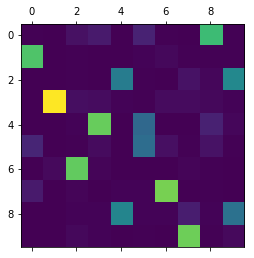

Accuracy: 0.7370666666666666
Train accuracy


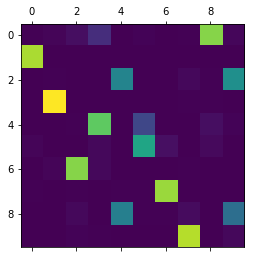

Accuracy: 0.81665
Test accuracy


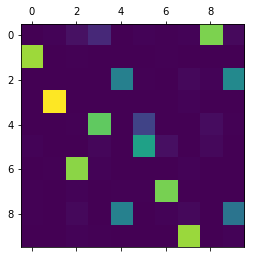

Accuracy: 0.8189


In [3]:
batches = np.array_split(x_train,256)

x = tf.placeholder(tf.float64, shape = [None,784])

layers = [x]

ew,eb = [] ,[]
#Load weights from pretraining stage
for i in range(4):
    ew.append(tf.Variable(np.loadtxt("pre2_ew"+str(i)),dtype="float64"))
    eb.append(tf.Variable(np.loadtxt("pre2_eb"+str(i)),dtype="float64"))
    
#I assemble encoder in Tensorflow because encoder weights have to be updated along with centroids
for i in range(len(ew)):
    if i == len(ew)-1:
        e_out = tf.add(tf.matmul(layers[-1], ew[i]),eb[i])
    else:
        e_out = tf.nn.relu(tf.add(tf.matmul(layers[-1], ew[i]),eb[i]))
    layers.append(e_out)

centroids = tf.Variable(np.zeros([10,10]))

#Student's t distribution
q = 1.0/(1.0+tf.reduce_sum((tf.expand_dims(layers[4],axis=1)-centroids)**2.0,axis=2))
q_norm = tf.reduce_sum(q,axis=1)
qdist = q/tf.expand_dims(q_norm,axis=1)

p = (qdist**2.0)/tf.reduce_sum(qdist,axis=0)
p_norm = tf.reduce_sum(p,axis=1)
pdist = p/tf.expand_dims(p_norm,axis=1)

#I had to inverse of minimization 
#Because for some reason when I try to minimize kl divergence Tensorflow messes up the centroids
kl = -tf.reduce_sum(pdist*tf.log(pdist/qdist))
#Tell the optimizer that we have to update not only centroids but also the encoder weights
opt = tf.train.GradientDescentOptimizer(0.001).minimize(kl,var_list=ew+eb+[centroids])

#Sample to cluster classification from centroids operation
pred = tf.argmin(tf.reduce_sum(tf.pow(tf.expand_dims(layers[4],axis=1)-centroids,2),axis=2),axis=1)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Get encoded training set
x_encoded = sess.run(layers[4],feed_dict={x:x_train})

print("Training Kmeans")
clf = KMeans(10,n_init=20).fit(x_encoded) #10 classes, 20 restarts
sess.run(centroids.assign(clf.cluster_centers_)) #Initialize DEC centroids with kmeans centroids

last_y = sess.run(pred,feed_dict={x:x_train})

#Tolerance precentage for the amount of samples that changed their classes after gradient updates
tol = 0.001 
#N amount of samples equivalent to the tolerance percentage
c = tol*len(x_encoded)

changed_num = c/tol #Maximize changed sample number before start

while True:
    l = 0
    for batch in batches:
        _,lb= sess.run([opt,kl],feed_dict=
                       {x:batch})
        l+=lb
        
    new_y = sess.run(pred,feed_dict={x:x_train})
    changed_num = np.sum(last_y!=new_y)
    last_y = new_y
    
    print("Changed samples: "+str(changed_num)+" KL="+str(l/256)+", Acc: "+str(accuracy_details(last_y,y_train,False)))
    if changed_num<c:
        print()
        break


k_pred = clf.predict(x_encoded) #Encoder+Kmeans predicions
test_pred = sess.run(pred,feed_dict={x:x_test}) #Test_set DEC predictions

print("Kmeans accuracy")
accuracy_details(k_pred,y_train)

print("Train accuracy")
accuracy_details(last_y,y_train)

print("Test accuracy")
accuracy_details(test_pred,y_test)
sess.close()

# In case if you are really intrested in plain kmeans accuracy which will train for the rest of your life

Pure Kmeans accuracy


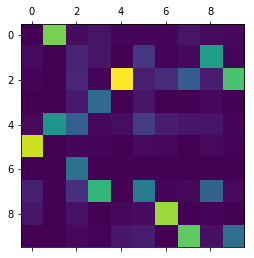

Accuracy: 0.5222


0.5222

In [7]:
kmeans = KMeans(10,n_init=20).fit(x_train)
test_predictions = kmeans.predict(x_test)
print("Pure Kmeans accuracy")
accuracy_details(test_predictions,y_test)